# Выполнение индивидуального задания в рамках Лабораторной работы 7. Вариант 14

Подключение к базе данных в PostgreSQL и создание необходимых для начала работы таблиц, заполненных предоставленными данными

In [1]:
!pip install psycopg2

In [2]:
import psycopg2
from psycopg2 import Error

try:
    # Подключение к существующей базе данных
    connection = psycopg2.connect(user="postgres",      # Замените на ваши данные
                                  password="111",  # Замените на ваши данные
                                  host="localhost",        # Замените на ваши данные
                                  port="5432",        # Обычно 5432
                                  database="medical_db_upd")     # Замените на ваши данные

    # Создание курсора для выполнения операций с базой данных
    cursor = connection.cursor()

    cursor.execute("""
            CREATE TABLE hospital (
                hospital_id INT PRIMARY KEY,
                hospital_name VARCHAR(100) NOT NULL,
                bed_count INT
            );
        """)
    
    cursor.execute(''' 
        ALTER TABLE hospital
        ADD COLUMN hospital_type VARCHAR(50);
    ''')

    cursor.execute("""
            INSERT INTO hospital (hospital_id, hospital_name, bed_count, hospital_type )
            VALUES
                (1, 'Mayo Clinic', 200, 'General'),
                (2, 'Cleveland Clinic', 400, 'General'),
                (3, 'Johns Hopkins', 1000, 'Specialized'),
                (4, 'UCLA Medical Center', 1500, 'General');
        """)
    connection.commit()
    print("Таблица hospital создана и заполнена данными")

    cursor.execute("""
            CREATE TABLE doctor (
                doctor_id INT PRIMARY KEY,
                doctor_name VARCHAR(100) NOT NULL,
                hospital_id INT NOT NULL,
                FOREIGN KEY (hospital_id) REFERENCES hospital(hospital_id),
                joining_date DATE NOT NULL,
                speciality VARCHAR(100) NOT NULL,
                salary INT NOT NULL,
                experience INT
            );
        """)
    cursor.execute("""
            INSERT INTO doctor (doctor_id, doctor_name, hospital_id, joining_date, speciality, salary, experience)
            VALUES
                (101, 'David', 1, '2005-02-10', 'Pediatric', 40000, NULL),
                (102, 'Michael', 1, '2018-07-23', 'Oncologist', 20000, NULL),
                (103, 'Susan', 2, '2016-05-19', 'Gynecologist', 25000, NULL),
                (104, 'Robert', 2, '2017-12-28', 'Pediatric', 28000, NULL),
                (105, 'Linda', 3, '2004-06-04', 'Gynecologist', 42000, NULL),
                (106, 'William', 3, '2012-09-11', 'Dermatologist', 30000, NULL),
                (107, 'Richard', 4, '2014-08-21', 'Gynecologist', 32000, NULL),
                (108, 'Karen', 4, '2011-10-17', 'Radiologist', 30000, NULL),
                (109, 'James', 1, '2022-01-15', 'Cardiologist', 45000, 5),
                (110, 'Emily', 1, '2023-04-10', 'Orthopedic Surgeon', 50000, 3),
                (111, 'Olivia', 2, '2021-09-05', 'Neurologist', 42000, 4),
                (112, 'John', 2, '2024-02-18', 'Surgeon', 60000, 2),
                (113, 'Sophia', 3, '2022-07-30', 'Urologist', 38000, 6),
                (114, 'Daniel', 3, '2025-03-22', 'Pulmonologist', 47000, 1),
                (115, 'Isabella', 4, '2023-11-01', 'Pediatrician', 41000, 3),
                (116, 'Liam', 4, '2022-05-25', 'Dermatologist', 35000, 4),
                (117, 'Mia', 1, '2024-06-17', 'Gastroenterologist', 53000, 2),
                (118, 'Lucas', 2, '2023-01-12', 'Anesthesiologist', 46000, 3);
        """)
    connection.commit()
    print("Данные успешно вставлены в таблицу 'Hospital'")

except (Exception, Error) as error:
    print("Ошибка при подключении к PostgreSQL:", error)

finally:
    # Закрытие соединения (если оно было установлено)
    if connection:
        if cursor:
            cursor.close()
        connection.close()
        print("Соединение с PostgreSQL закрыто")

Таблица hospital создана и заполнена данными
Данные успешно вставлены в таблицу 'Hospital'
Соединение с PostgreSQL закрыто


# Задания к Варианту 14

# Задания 1 и 2: Создайте таблицу "Doctor_Specialization" с полями "ID", "NAME" & Вставьте данные о 5 новых специализациях в таблицу "Doctor_Specialization"

In [3]:
import psycopg2
from psycopg2 import Error

try:
    # Подключение к существующей базе данных
    connection = psycopg2.connect(user="postgres",      # Замените на ваши данные
                                  password="111",  # Замените на ваши данные
                                  host="localhost",        # Замените на ваши данные
                                  port="5432",        # Обычно 5432
                                  database="medical_db_upd")     # Замените на ваши данные

    # Создание курсора для выполнения операций с базой данных
    cursor = connection.cursor()


    cursor.execute("""
            CREATE TABLE Doctor_Specialization (
                id INT PRIMARY KEY,
                name VARCHAR(100) NOT NULL
            );
        """)
    cursor.execute("""
            INSERT INTO Doctor_Specialization (id, name)
            VALUES
                (1, 'Cardiology'),
                (2, 'Neurology'),
                (3, 'Pediatrics'),
                (4, 'Surgery'),
                (5, 'Dermatology');
        """)
    connection.commit()
    print("Таблица Doctor_Specialization создана и заполнена данными")


except (Exception, Error) as error:
    print("Ошибка при подключении к PostgreSQL:", error)

finally:
    # Закрытие соединения (если оно было установлено)
    if connection:
        if cursor:
            cursor.close()
        connection.close()
        print("Соединение с PostgreSQL закрыто")

Таблица Doctor_Specialization создана и заполнена данными
Соединение с PostgreSQL закрыто


# Задание 3: Получите всех врачей по специальности "Orthopedic".

In [10]:
import psycopg2
from psycopg2 import Error

try:
    # Подключение к существующей базе данных
    connection = psycopg2.connect(user="postgres",      # Замените на ваши данные
                                  password="111",  # Замените на ваши данные
                                  host="localhost",        # Замените на ваши данные
                                  port="5432",        # Обычно 5432
                                  database="medical_db_upd")     # Замените на ваши данные

    # Создание курсора для выполнения операций с базой данных
    cursor = connection.cursor()


    cursor.execute("""select * from doctor
        where speciality like '%Orthopedic%'           
        """)
    for row in cursor:
            print(row)

except (Exception, Error) as error:
    print("Ошибка при подключении к PostgreSQL:", error)

finally:
    # Закрытие соединения (если оно было установлено)
    if connection:
        if cursor:
            cursor.close()
        connection.close()
        print("Соединение с PostgreSQL закрыто")

(110, 'Emily', 1, datetime.date(2023, 4, 10), 'Orthopedic Surgeon', 50000, 3)
Соединение с PostgreSQL закрыто


# Задание 4: Обновите зарплату врача с ID=106 на 52000.

In [14]:
import psycopg2
from psycopg2 import Error

try:
    # Подключение к существующей базе данных
    connection = psycopg2.connect(user="postgres",      # Замените на ваши данные
                                  password="111",  # Замените на ваши данные
                                  host="localhost",        # Замените на ваши данные
                                  port="5432",        # Обычно 5432
                                  database="medical_db_upd")     # Замените на ваши данные

    # Создание курсора для выполнения операций с базой данных
    cursor = connection.cursor()

    cursor.execute(""" SELECT *
                   FROM doctor
                   WHERE doctor_id = 106           
        """)
    print("Данные о старой зарплате: ")
    for row in cursor:
            print(row)

    cursor.execute(""" UPDATE doctor
                   SET salary = '52000'
                   WHERE doctor_id = 106           
        """)
    connection.commit()

    cursor.execute(""" SELECT *
                   FROM doctor
                   WHERE doctor_id = 106           
        """)
    print("Данные о новой зарплате :")
    for row in cursor:
            print(row)

except (Exception, Error) as error:
    print("Ошибка при подключении к PostgreSQL:", error)

finally:
    # Закрытие соединения (если оно было установлено)
    if connection:
        if cursor:
            cursor.close()
        connection.close()
        print("Соединение с PostgreSQL закрыто")

Данные о старой зарплате: 
(106, 'William', 3, datetime.date(2012, 9, 11), 'Dermatologist', 30000, None)
Данные о новой зарплате :
(106, 'William', 3, datetime.date(2012, 9, 11), 'Dermatologist', 52000, None)
Соединение с PostgreSQL закрыто


# Задание 5: Постройте круговую диаграмму для визуализации распределения больниц по типу.

In [1]:
!pip install matplotlib

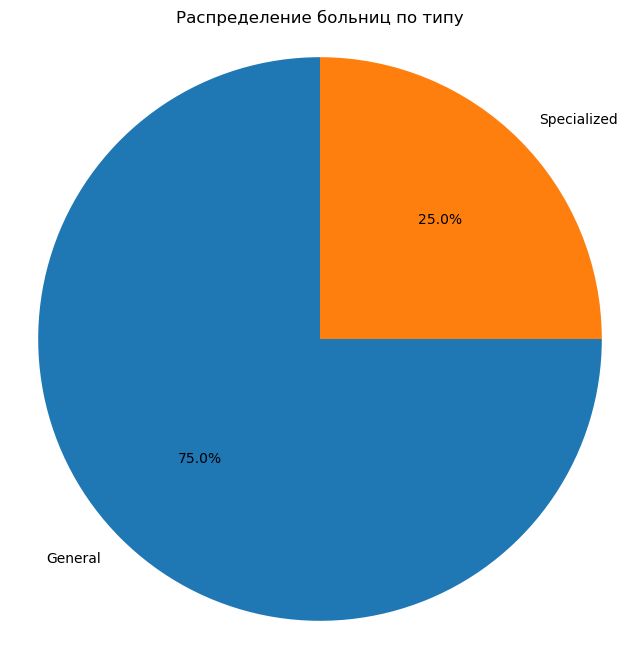

Соединение с PostgreSQL закрыто


In [2]:
import psycopg2
import matplotlib.pyplot as plt

try:
    # Подключение к базе данных
    connection = psycopg2.connect(
        user="postgres",  # Замените на ваши данные
        password="111",  # Замените на ваши данные
        host="localhost",  # Замените на ваши данные
        port="5432",  # Обычно 5432
        database="medical_db_upd"  # Замените на ваши данные
    )

    # Создание курсора для выполнения операций с базой данных
    cursor = connection.cursor()

    # Запрос для получения данных о типах больниц
    cursor.execute("""
        SELECT hospital_type, COUNT(*) AS count
        FROM hospital
        GROUP BY hospital_type;
    """)

    # Извлечение данных
    data = cursor.fetchall()

    # Разделение данных на два списка: типы больниц и их количество
    hospital_types = [row[0] for row in data]
    counts = [row[1] for row in data]

    # Построение круговой диаграммы
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=hospital_types, autopct='%1.1f%%', startangle=90)
    plt.title('Распределение больниц по типу')
    plt.axis('equal')  # Делает круг круглым
    plt.show()

except (Exception, psycopg2.Error) as error:
    print("Ошибка при работе с PostgreSQL:", error)

finally:
    # Закрытие соединения
    if connection:
        if cursor:
            cursor.close()
        connection.close()
        print("Соединение с PostgreSQL закрыто")